In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
from graphviz import Graph

In [2]:
# w.get_zillow_data()

In [3]:
df = w.get_zillow_data(cached=True)

In [4]:
# there are a lot of nulls in this dataset, 

df.shape[0] - (df.shape[0] * .15)

18652.4

In [5]:
# df.isnull().sum().sort_values(ascending=False) 

In [6]:
df = df.dropna(axis=1,thresh=18653)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21944 entries, 0 to 21943
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      21944 non-null  int64  
 1   id                            21944 non-null  int64  
 2   bathroomcnt                   21938 non-null  float64
 3   bedroomcnt                    21938 non-null  float64
 4   calculatedbathnbr             21762 non-null  float64
 5   calculatedfinishedsquarefeet  21883 non-null  float64
 6   finishedsquarefeet12          20951 non-null  float64
 7   fips                          21938 non-null  float64
 8   fullbathcnt                   21762 non-null  float64
 9   latitude                      21938 non-null  float64
 10  longitude                     21938 non-null  float64
 11  lotsizesquarefeet             19642 non-null  float64
 12  propertycountylandusecode     21938 non-null  object 
 13  p

In [8]:
features = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'roomcnt', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'transactiondate']

In [9]:
df = df[features]

In [10]:
df.set_index('parcelid', inplace=True)

In [11]:
list(df.columns)

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'roomcnt',
 'regionidzip',
 'yearbuilt',
 'taxvaluedollarcnt',
 'transactiondate']

In [12]:
df.columns = ['bathrooms',
 'bedrooms',
 'square_feet',
 'total_rooms',
 'zip_code',
 'year_built',
 'tax_value',
 'transaction_date']

In [13]:
df.info(), df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21944 entries, 11393337 to 13083743
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bathrooms         21938 non-null  float64
 1   bedrooms          21938 non-null  float64
 2   square_feet       21883 non-null  float64
 3   total_rooms       21938 non-null  float64
 4   zip_code          21924 non-null  float64
 5   year_built        21857 non-null  float64
 6   tax_value         21938 non-null  float64
 7   transaction_date  21944 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.5+ MB


(None,
 bathrooms              19
 bedrooms               13
 square_feet          3728
 total_rooms            14
 zip_code              383
 year_built            129
 tax_value           17442
 transaction_date       62
 dtype: int64)

In [21]:
cols = list(df.columns)

In [14]:
df = ex.remove_outliers(df, 'tax_value', multiplier=1.5)

In [15]:
df.shape

(20492, 8)

In [18]:
train, validate, test = w.train_validate_test_split(df)

In [19]:
train.shape, validate.shape, test.shape

((11475, 8), (4918, 8), (4099, 8))

In [28]:
list(df.columns)

['bathrooms',
 'bedrooms',
 'square_feet',
 'total_rooms',
 'zip_code',
 'year_built',
 'tax_value',
 'transaction_date']

In [31]:
target = 'tax_value'
cat_vars = ['zip_code']
quant_vars = ['bathrooms','bedrooms','square_feet','total_rooms','year_built', 'transaction_date']

zip_code 
_____________________

           chi2       p-value  degrees of freedom
0  3.696075e+06  1.223585e-33             3663414

observed:
 tax_value  15692.0  16514.0  19616.0  19624.0  19833.0  20655.0  21074.0  \
zip_code                                                                   
95982.0          0        0        0        0        0        0        0   
95983.0          0        0        0        0        1        0        0   
95984.0          0        0        0        0        0        0        0   
95985.0          0        0        0        0        0        0        0   
95986.0          0        0        0        0        0        0        0   
...            ...      ...      ...      ...      ...      ...      ...   
97330.0          0        0        0        0        0        0        0   
97331.0          0        0        0        0        0        0        0   
97344.0          0        0        0        0        0        0        0   
399675.0         0 

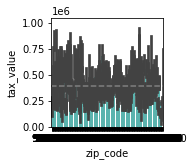


_____________________

bathrooms 
____________________



In [ ]:
ex.explore_bivariate(train, target, cat_vars, quant_vars)